# Machine Learning with Python - Model Validation and Selection

## Introduction

In the previous rounds you have implemented supervised machine learning (ML) methods by combining particular choices for

* data points, their features and labels, 
* a hypothesis space (of predictor functions) 
* and a loss function that measures the quality of a particular predictor function out of the hypothesis space. 

ML algorithms are optimization methods that try to find (or learn) the best predictor out of the hypothesis space by minimizing the average loss over some labeled data points (the training data). This predictor is then used to predict the labels of new data points.

The previous rounds have focused on the problem of learning a good (accurate) predictor by minimizing the average loss incurred over some labeled (training) data points. Eventually, we are not primarily interested 
in how well the predictor is doing on **training data** but rather in how well it is doing on **new data which is different from the training data**. We want the learned predictor to **generalize** well to new data. 

The generalization of a predictor depends not only on the (amount of) training data but also on the hypothesis space (which we refer to as "model"). We can validate a particular choice for the hypothesis space (model) by a simple two-step process<
* First, we train a predictor by minimizing the loss over the training data. The so-obtained predictor is the optimal predictor out of the hypothesis space in terms of training error. </li>
* In a second (validation) step, we determine the loss ("validation error") of the so-obtained optimal predictor on some new data points, which is different from the training data.&nbsp;&nbsp;</li>

The validation error allows to choose between different hypothesis spaces, i.e., to do <b>model selection</b>. Model selection is a simple but powerful tool to obtain ML method that generalize well to data which is different from the training data. 

Another approach to ensure good generalization is **regularization**. Roughly speaking, regularization aims at anticipating the increase in the loss, relative to the average loss on the training data, when the predictor is applied to new data. This anticipation can be based on symmetries or invariances (a rotated cat image is still a cat image) as well as on robustness requirements (zeroing few pixels of a cat image should still allow to classify it as a cat image).

We begin this round with an example that presents the problem of **overfitting** that is prevalent when fitting complex predictors to data. 

The code snippet below read in some data points $(x^{(i)},y^{(i)})$, for $i=1,2,\ldots$, which are characterized by a scalar feature $x^{(i)}$ and a numeric label $y^{(i)}$. Note that we consider the datapoint in the last element of $y$ to be an outlier and remove this from the dataset.

Total number of labeled data points =  19


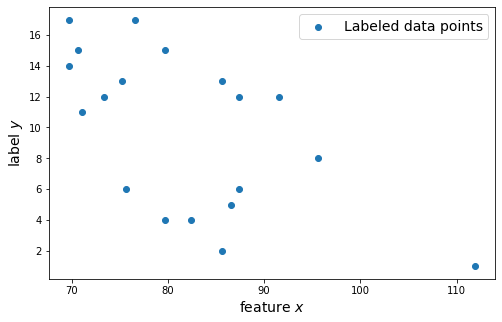

In [59]:
# Import libraries
import numpy as np 
from sklearn import datasets 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# load the toy dataset "linnerud" provide by the "sklearn" package
linnerud = datasets.load_linnerud()
# read in the exercise parameters (nr. of chinups ..) for each athlete
Exercise = linnerud['data']
# read in the physiological (weight ...) paramters for each athlete
Physio = linnerud['target']

x = Physio[:-1,0].reshape(-1,1) 
# convert Lbs to Kg
x = x*0.453 
# we use number of chinups as label and store them (for all athletes) in numpy array y
y = Exercise[:-1,0] 

m_total = y.shape[0]  # Number of datapoints in the dataset
print ("Total number of labeled data points = ", m_total)

# Plot a scatterplot of the dataset
plt.figure(figsize=(8, 5))
plt.scatter(x, y,label="Labeled data points")
plt.ylabel('label ' + r'$y$')
plt.xlabel('feature ' + r'$x$')
plt.legend()
plt.show()

Next, we choose four data points as our **training set** in this example. The training set is the set on which we will fit the models. The rest of the data will be used to assess how well the model fitted on the training set predicts the values of data points that are not used in training. Conventionally, this set is called the **validation set**.

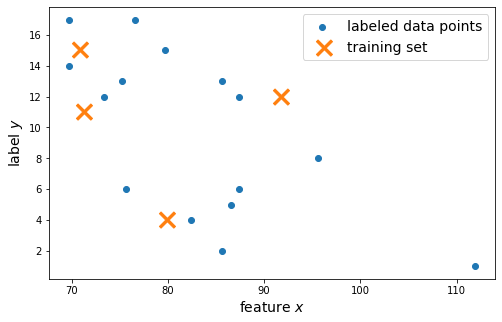

In [60]:
# Choose the datapoints in the 4 final elements as the training set
x_train = x[m_total-4:]
y_train = y[m_total-4:]

# Let the rest be the validation set
x_val = x[:m_total-4]
y_val = y[:m_total-4]

# Plot the points not in the training set and the points in the training set
plt.figure(figsize=(8, 5))
plt.scatter(x_val, y_val, label="labeled data points")
plt.scatter(x_train, y_train, s=400, marker=r'$\times$', label="training set")
plt.ylabel('label ' + r'$y$')
plt.xlabel('feature ' + r'$x$')
plt.legend(loc='upper right')
plt.show()

Next, we will compare the fit of two polynomial predictors of different degree on the training set and analyze how well the optimal predictors generalize to the validation set.

Using the four data points (marked by crosses in the above plot) in the training set, we learn (find) the best predictors out of the hypothesis spaces

$$ \mathcal{H}^{(4)} = \{ h(x) = w_{0}+w_{1}x+w_{2}x^2+w_{3}x^3+w_{4}x^{4} \mbox{ with tunable weights } w_{0},\ldots,w_{4} \in \mathbb{R} \}.$$

and

$$ \mathcal{H}^{(1)} = \{ h(x) = w_{0}+w_{1}x \mbox{ with tunable weights } w_{0},w_1 \in \mathbb{R} \}.$$

That is, we fit a fourth degree polynomial regression model and a linear regression model to the training data.

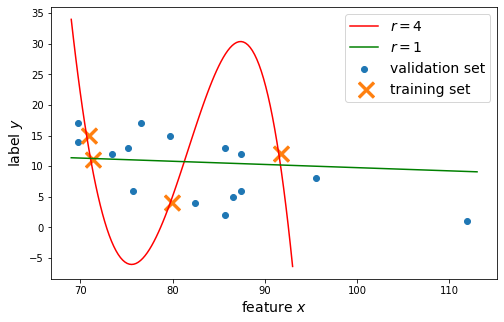

In [61]:
# choose best predictor out of the hypothesis space given by all 
# polynomials h(x) = w_0 + w_1*x ... + w_4*x^4 of maximum degree 4 
poly = PolynomialFeatures(degree = 4) 
# transform scalar feature x to a feature vector [x^0 x^1 ... x^4]
X_poly = poly.fit_transform(x_train) 
# we can now use linear regression using the transformed feature vectors 
poly_reg = LinearRegression() 
# compute optimal weights to minimize training error 
poly_reg.fit(X_poly, y_train) 

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Plot the resulting "optimal" predictor (having minimum training error) 
x_grid = np.linspace(69, 93, num=100)
x_grid_2 = np.linspace(69, 113, num=100)
X_poly = poly.fit_transform(x_grid.reshape(-1,1))

# Plot the dataset and predictor functions
plt.figure(figsize=(8,5))
plt.scatter(x_val, y_val,label="validation set")
plt.scatter(x_train, y_train, s=400,marker=r'$\times$', label="training set")
plt.plot(x_grid, poly_reg.predict(X_poly), color = 'red', label="$r=4$")
plt.plot(x_grid_2, lin_reg.predict(x_grid.reshape(-1,1)), color = 'green', label="$r=1$")
plt.ylabel('label ' + r'$y$')
plt.xlabel('feature ' + r'$x$')
plt.legend(loc='upper right')
plt.show()

The above figure shows that the 4th-degree polynomial (the red curve) fits the training data (orange crosses) almost perfectly. The average mean-squared error incurred on the four training data points is virtually zero. However, it is clear that the polynomial fits the data outside of the training set very poorly.

In contrast, the linear predictor provides a reasonable linear trend for the entire dataset, even though its fit on the training set is worse than that of the 4th-degree polynomial.

The phenomenon where a predictor has a very low error on the training set but generalizes poorly to other data from the same distribution is called **overfitting**. Thus, we can conclude that the 4th-degree polynomial predictor **overfits** the training data in the example. Due to the possibility of overfitting, we cannot be confident that a predictor that fits the training data well can accurately predict the labels of new data points.

The key idea of **validation** is to estimate the error of a predictor on data points that are not used for training the model. The validation error exposes models that overfit the training data. Thus, it gives a more realistic estimate of a model's predictive capability on new data points than the training error. In the above figure, we could use the prediction error incurred for the data points marked by blue dots to validate the predictor functions. 

## Learning goals


In this round, you will learn a simple but powerful approach for choosing a "good" hypothesis space out of a set of alternatives. In particular, you will 

* learn that the training error is a poor quality measure for a hypothesis space 
* learn that the validation error is a more useful quality measure for a hypothesis space 
* learn how to choose between different hypothesis spaces (models) using the validation error
* learn about regularization as a soft variant of model selection. 

## Background Material 

* [Video lecture](https://www.youtube.com/watch?v=MyBSkmUeIEs) of Prof. Andrew Ng on model validation and selection
* [Short video](https://www.youtube.com/watch?v=TIgfjmp-4BA) on K-Fold Cross validation from Udacity
* [Video lecture](https://www.youtube.com/watch?v=KvtGD37Rm5I) of Prof. Andrew Ng on regularization
* Chapter 2; Chapter 6; Chapter 7 of this [tutorial](https://arxiv.org/abs/1805.05052)  


## What is model validation?

Suppose that we want to predict a numeric label (quantity of interest) $y \in \mathbb{R}$ based on some features $\mathbf{x}=(x_{1},\ldots,x_{n}) \in \mathbb{R}^{n}$ of a data point. In order to learn a good predictor $h(\mathbf{x})$, we can use some data points $\mathbb{X} = \{ \big( \mathbf{x}^{(i)},y^{(i)}\big)\}$ for which we have determined the true label value $y^{(i)}$. Each data point in the training data $\mathbb{X}$ is characterized by features $\mathbf{x}^{(i)}$ and a label (quantity of interest) $y^{(i)}$. 

Consider a predictor $h(\mathbf{x})$ which works extremely well on the dataset $\mathbb{X}$,

\begin{equation}
\sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}}\big(y^{(i)} - \underbrace{h(\mathbf{x}^{(i)})}_{= \hat{y}^{(i)}}\big)^{2}\approx 0.
\end{equation}

Even if the predictor $h(\mathbf{x})$ does exceptionally well on the data set $\mathbb{X}$, we can not be sure that the method will work well on new data points (different from the data points in $\mathbb{X}$). 
This is particularly true for ML models that allow for complex predictor functions $h(\mathbf{x})$. Examples of complex  predictor functions are linear functions $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} = \sum_{r=1}^{n} x_{r} w_{r}$ using a large number of features $x_{1},\ldots,x_{n}$ (the number $n$ of features is a measure of the complexity of the space of linear functions).

Another example of a vast hypothesis space is the set of all predictor functions that can be represented by a given deep neural network structure with billions of adjustable weights (each edge has one weight $w$ that can be tuned). When using a large hypothesis space $\mathcal{H}$, it is very likely that just by chance, one can find a predictor function $h(\cdot) \in \mathcal{H}$ that perfectly fits (reproduces) a given set of labeled data points (unless this dataset is VERY large). 

It is worth emphasizing that the optimal complexity of the predictor function is typically dependent on the size of the dataset. A deep neural network might generalize well when trained on a huge dataset, whereas even a linear model with many features might be prone to severe overfitting on a small dataset. In particular, one can show that if the number of features is equal to the number of data points, a linear model can perfectly fit the data.

ML methods that perform well on training data due to memorization of the training data do not pick up any intrinsic relation between features $\mathbf{x}$ and label $y$. Such an ML method merely overfits the training data and will not be able to **generalize well** to new data. 

To detect overfitting, we need to implement some form of **validation**. The idea behind validation is quite simple: 

**Split the available labeled data points $\mathbb{X}$ into two different subsets, a training set $\mathbb{X}^{(t)}$ of size $m_{t}$ and a validation set $\mathbb{X}^{(v)}$ of size $m_{v}$.**

<img src="../../data/R4_ModelValSel/SplitValTrain.jpg" alt="Drawing" style="width: 600px;"/>

<a id='splitTestandValidationfunction'></a>
<div class=" alert alert-info">
<b>Demo.</b> Split Data into Training and Validation Set.

The code snippet below creates a synthetic dataset of $m$ datapoints $(\mathbf{x}^{(i)},y^{(i)})$. Each data point is characterized by the feature vector $\mathbf{x}^{(i)}=\big(x^{(i)}_{1},\ldots,x_{n}^{(i)}\big)^{T} \in \mathbb{R}^{n}$ and a numeric label $y^{(i)} \in \mathbb{R}$. The feature vectors are stored in the rows of the matrix $\mathbf{X}\in \mathbb{R}^{m \times n}$. The labels are collected into the vector $\mathbf{y}=\big(y^{(1)},\ldots,y^{(m)}\big)^{T} \in \mathbb{R}^{m}$. 

Furthermore, the code snippet uses the function 

`X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=2)` 

from the scikit-learn library to split the dataset into a training and validation set. The function reads in the feature vectors in the NumPy array `X` of shape ($m,n$) and the labels in the NumPy array `y` of shape ($m,$). 

The function returns numpy arrays `X_train` of shape ($m_{t},n$), `X_val`of shape ($m_{v},n$), `y_train` of shape ($m_{t},$) and `y_val` of shape ($m_{v},$). The input parameter `test_size` specifies the relative size $m_{v}/m$ of the validation set. When using `test_size=0.2`, $20 \%$ of the original data points are used for the validation set and the remaining $80 \%$ in the training set.

[Scikit-learn documentation of train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
</div>

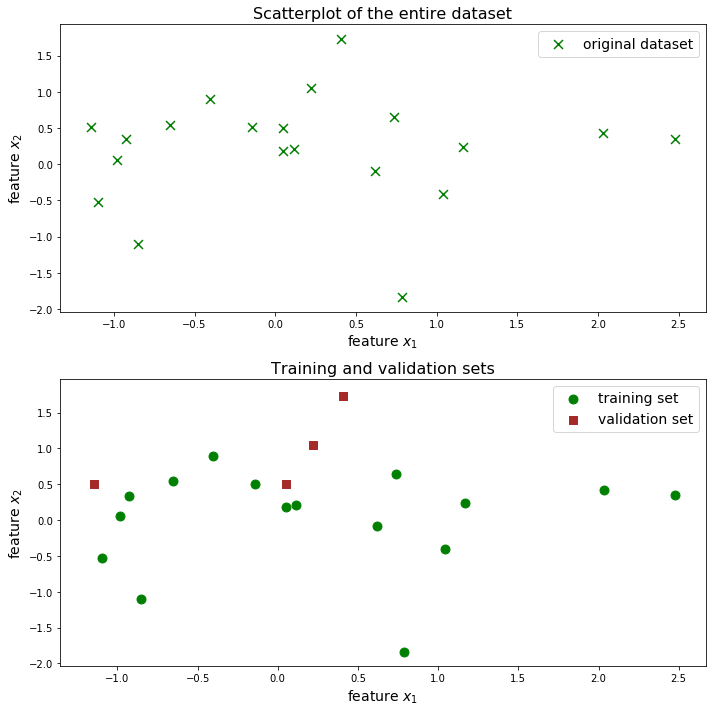

In [62]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split    # Import train_test_split function
from sklearn import metrics

m = 20    # Number of data points
n = 10    # Number of features

np.random.seed(4)    # Set random seed for reproduceability

X = np.random.randn(m,n)    # create feature vectors using random numbers
y = np.random.randn(m)    # create labels using random numbers 

# Split dataset with 80% training and 20% test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2) 

plt.rc('legend', fontsize=14)    #  Set font size for legends
plt.rc('axes', labelsize=14)    #  Set font size for axis labels

fig, axes = plt.subplots(2, 1, figsize=(10,10))    # Create figure with two subplots
axes[0].set_title('Scatterplot of the entire dataset', fontsize=16)

axes[0].scatter(X[:, 0], X[:, 1], c='g',marker ='x', s=80, label='original dataset')  # Scatter plot of the original dataset
axes[0].legend(loc='best')    # Set legend and set it in the best (automatically determined) position
axes[0].set_xlabel(r'feature $x_1$')    # Set the label of the x-axis
axes[0].set_ylabel(r'feature $x_2$')    # Set the label of the y-axis

axes[1].scatter(X_train[:, 0], X_train[:, 1], c='g', marker ='o', s=80, label='training set')  # Scatter plot of the training set
axes[1].scatter(X_val[:, 0], X_val[:, 1], c='brown', marker ='s', s=80, label='validation set')  # Scatter plot of the validation set
axes[1].set_title('Training and validation sets', fontsize=16)
axes[1].legend(loc='best')    # Set legend and set it in the best (automatically determined) position
axes[1].set_xlabel(r'feature $x_1$')    # Set the label of the x-axis
axes[1].set_ylabel(r'feature $x_2$')    # Set the label of the y-axis

fig.tight_layout()
plt.show()

The training set $\mathbb{X}^{(t)}$ is then used to learn the optimal predictor $h_{\rm opt} \in \mathcal{H}$ that minimizes the **training error** 

\begin{equation}
E_{\rm train} = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)})\big)^{2}.
\end{equation} 

Note that the training error $E_{\rm train}$ measures the performance of the predictor $h_{\rm opt}$ on the same data points $\mathbb{X}^{(t)}$ which have been used to tune (learn) $h_{\rm opt}$. Therefore, the training error $E_{\rm train}$ is too **optimistic** as an estimate for the average error (or loss) of $h_{\rm opt}$ on new data points which are different from $\mathbb{X}^{(t)}$. 

To estimate the error incurred by $h_{\rm opt}$ on new data points, we calculate the average loss incurred by $h_{\rm opt}$ on the validation set $\mathbb{X}^{(v)}$. This yields the **validation error**

\begin{equation}
E_{\rm val} = (1/m_{v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}. 
\end{equation}

The validation error $E_{\rm val}$ is a much better estimate for the average error (or loss) of the predictor $h_{\rm opt}$. 

The training error $E_{\rm train}$ provides a quality measure for the particular predictor $h_{\rm opt}$. In contrast, the validation error $E_{\rm val}$ provides a quality measure for the entire hypothesis space $\mathcal{H}$. Therefore, we can use the validation error for **model selection**. In model selection, we choose the best hypothesis space $\mathcal{H}$ out of a set of alternative hypothesis spaces $\mathcal{H}^{(1)},\mathcal{H}^{(2)},\ldots$ by selecting the one that achieves the lowest validation error $E_{\rm val}$.

## The Problem 

Model validation and selection is best understood by working through a particular example. To this end, we revisit the problem of predicting the grayscale value $y$ of a pixel in an aerial photograph. In **Round 2 - Regression**, we have formalized the grayscale value prediction as an ML problem with

1. **data points** which represent pixels in the photograph. Each data point is characterized by features $\mathbf{x} = (x_{1},\ldots,x_{n}) \in \mathbb{R}^{n}$. Moreover, we define the grayscale value of the pixel as the label $y$ of the data point. 

2. a **hypothesis space** $\mathcal{H}$ consisting of predictor functions $h: \mathbb{R}^{n} \rightarrow \mathbb{R}$ from features $\mathbf{x} \in \mathbb{R}^{n}$ to a predicted grayscale value $\hat{y}=h(\mathbf{x})\in \mathbb{R}$ and 

3. a **loss function**, such as squared error loss, which measures the quality of a predictor.

<a id='handsondata'></a>
<div class=" alert alert-info">
<p><b>Demo.</b> Loading the Data.</p>
    
The following code snippet defines a function `X,y = GetFeaturesLabels(m,n)` which reads in the features and labels of pixels which are not corrupted (not fully black). The input parameters are the number `m` of data points and the number `n` of features to be used for each data point. The function returns a matrix $\mathbf{X}$ and vector $\mathbf{y}$. 

The features $\mathbf{x}^{(i)}$ of data points are stored in the rows of the numpy array `X` (of shape (m,n)) and the corresponding grayscale values $y^{(i)}$ in the numpy array `y` (of shape (m,1)). The two arrays represent the feature matrix $\mathbf{X} = \begin{pmatrix} \mathbf{x}^{(1)} & \ldots & \mathbf{x}^{(m)} \end{pmatrix}^{T}$ and the label vector $\mathbf{y} = \big( y^{(1)}, \ldots, y^{(m)} \big)^{T}$. 

</div>

In [63]:
# Pandas provides functions for loading (storing) data from (to) files
import pandas as pd  
# the library "cv2" provides powerful methods for image processing and computer vision
import cv2 
# import functions for displaying and plotting data 
from matplotlib import pyplot as plt 
from IPython.display import display, HTML
# library "numpy" provides matrix (represented by numpy arrays) operations 
import numpy as np   
# library "random" provides functions for generating random numbers
import random

def GetFeaturesLabels(m, n):
    
    # m - number of data points (pixels)
    # n - number of features
    
    # filename of image file containing corrupted pixels
    corrupted = '../../data/R2_Regression/SomePhotoCorrupted.bmp'
    
    # read corrupted image as numpy array
    Photo = cv2.imread(corrupted, 0)
    # set image size (100 by 100 pixels)
    Photo = cv2.resize(Photo, (100, 100))
    
    # get image height and width 
    imgheight = Photo.shape[0]
    imgwidth = Photo.shape[1]

    # determine "uncorroputed pixels" by finding indices of those pixels with grayscale value larger than 0
    good_idx = np.where(Photo > 0)

    # store the vertical coordinate (row index) of uncorroputed pixels in numpy array `rows`
    rows = good_idx[0] 
    # store the horizontal coordinate (column index) of uncorroputed pixels in numpy array `cols` 
    cols = good_idx[1]
    
    # set pads for defining pixel neighborhood and augmenting the image
    wp = 1
    hp = 1

    # augment image with stripes such that we can also define neighborhoods of border pixels 
    # the values of these pixels are zero
    tmp = np.vstack((np.zeros((wp, imgwidth)), Photo, np.zeros((wp, imgwidth))))
    augmented = np.hstack((np.zeros((2*wp + imgheight, hp)), tmp, np.zeros((2*wp + imgheight, hp))))

    # initialize feature vectors `x1`, `x2`and label vector `y` as numpy arrays 
    x1 = np.zeros((m,1))
    #x2 = np.zeros((m,1))
    y = np.zeros((m,1))
    
    # calculate the mean and median gray scale value of a pixel neighborhood 
    # here we define 3x3 pixel matrix surrounding a pixel as its neighborhood 
    for iter_datapoint in range(m):
        row = rows[iter_datapoint] + wp # add wp to get the index of same data point in augmented Photo
        col = cols[iter_datapoint] + hp # add hp to get the index of same data point in augmented Photo

        # get the true label (gray scale value) of a datapoint (pixel)
        y[iter_datapoint] = augmented[row, col]

        # get values of pixel with its neighborhood (3x3 matrix) from image
        neighbors = np.copy(augmented[(row-wp):(row+wp+1), (col-hp):(col+hp+1)])
        # set value of a data point to 0 in order to exlude this value from calculation
        # for the 3x3 array the indices for this data point(center of the neighborhood) is [1,1]
        neighbors[1,1] = 0
        
        # calculate the feature of a data point (pixel) - the mean and median gray level of the neighborhoud
        # zero values are exluded from calculation
        x1[iter_datapoint] = np.mean(neighbors[neighbors != 0])   
        #x2[iter_datapoint] = np.median(neighbors[neighbors != 0]) 
        
    np.random.seed(30) # this is done so that every time that below np.random.randn is called, it produces the same output. 
                       # this is needed for testing purposes
    # lets add some "extra features" here 
    X = np.hstack((x1, np.random.randn(n,m).T)) 
    
    X = X[:,:n]
    return X, y

## Linear Predictors 

To predict the grayscale value $y$ of a pixel based on the first $r$ features (or characteristics) $\mathbf{x}=(x_{1},\ldots,x_{r})^{T} \in \mathbb{R}^{r}$, we try to find (or learn) a predictor function $h(\mathbf{x})$ such that $y \approx h(\mathbf{x})$. We restrict ourselves to linear predictor functions in this notebook. Thus, we use the hypothesis space 

$$ \mathcal{H}^{(r)} = \{ h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x} \mbox{ with some weight } \mathbf{w}\in \mathbb{R}^{r} \}.$$ 

Carefully note that for each value $r\in \{1,\ldots,n\}$, we obtain a different hypothesis space $\mathcal{H}^{(r)}$ (or "model"). These hypothesis spaces are nested such that

$$\mathcal{H}^{(1)} \subseteq \mathcal{H}^{(2)} \subseteq \mathcal{H}^{(3)} \ldots .$$

This means that the hypothesis space $\mathcal{H}^{(i)}$ contains all functions in the hypothesis spaces $\mathcal{H}^{(j)}$, for $j=1,\ldots,i-1$.

For a fixed model parameter $r$, the weight vector $\mathbf{w} \in \mathbb{R}^{r}$ is tuned by minimizing the average squared error loss incurred on the labeled data points in the training set $\mathbb{X}^{(t)}$: 

\begin{align}\min_{h \in \mathcal{H}^{(r)}}  & \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}}  (y^{(i)} - h(\mathbf{x}^{(i)}) )^{2} \nonumber \\ 
= \min_{\mathbf{w} \in \mathbb{R}^{r}} & \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}}  \big(y^{(i)} -  \mathbf{w}^{T}\mathbf{x}^{(i)}  \big)^{2}.
\end{align}

Solving this training problem provides us with optimal choices for weight vector $\mathbf{w}$. 
However, we have another design parameter at our disposal: the number $r$ of features! While each pixel is characterized by $n$ features in our dataset, we are free to use fewer e.g. only the first $r \leq n$ of these features. 

What is the best choice for $r$? 

## The Wrong Way 

Let us try out each hypothesis space $\mathcal{H}^{(r)}$ on the training data $\mathbb{X}^{(t)}$. For each $r=1,\ldots,h,$ we find the optimal predictor $h_{\rm opt}^{(r)} \in \mathcal{H}^{(r)}$ by minimizing the average loss

\begin{align} 
\mathcal{E}(r) & = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- h^{(r)}(\mathbf{x}^{(i)}) \big)^{2},
\end{align} 

The training error for the hypothesis space $\mathcal{H}^{(r)}$ is then calculated as the mean-squared error incurred by the optimal predictor $h_{\rm opt}^{(r)}$:

\begin{align} 
E_{\rm train}(r) & = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- h_{\rm opt}^{(r)}(\mathbf{x}^{(i)}) \big)^{2} \nonumber \\ 
& = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big( y^{(i)}- \mathbf{w}_{\rm opt}^T \mathbf{x}^{(i)}) \big)^{2}. \nonumber 
\end{align} 

We can see that when the loss function is the mean-squared error - such as in ordinary least squares regression - the loss of the optimal predictor is equivalent to the training error. However, this is not always the case as we will see later in this notebook when considering regularization. 

It is tempting to choose the number $r$ of features according to the smallest training error $E_{\rm train}(r)$. 

<a id='trainModel'></a>
<div class=" alert alert-info">
<p><b>Demo.</b> Varying Number of Features </p>
    
The following code snippet computes the training error $E_{\rm train}(r)$ for each choice of $r$. For each particular value $r=1,\ldots,n$, the best linear predictor $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ is found using the  function `.fit()` of the `LinearRegression` class in scikit-learn.

[Documentation of the LinearRegression class in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 

</div>    

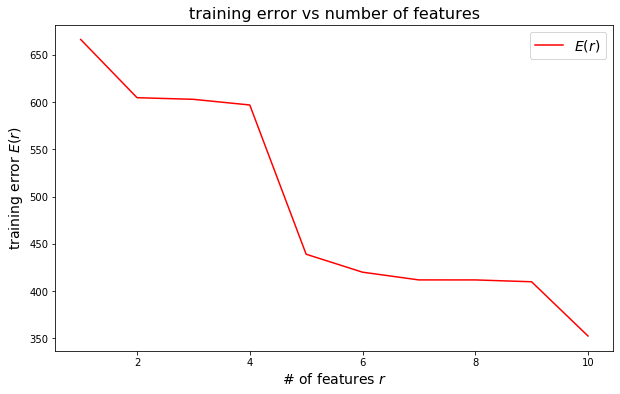

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

m = 20                        # we use the first m=20 data points (pixels) from the aerial photo 
n = 10                        # maximum number of features used 

X,y = GetFeaturesLabels(m,n)  # read in m data points using n features 
linreg_error = np.zeros(n)    # vector for storing the training error of LinearRegresion.fit() for each r

for r_minus_1 in range(n):    # loop r times
    reg = LinearRegression(fit_intercept=True)    # create an object for linear predictors
    reg = reg.fit(X[:,:(r_minus_1 + 1)], y)    # find best linear predictor (minimize training error)
    pred = reg.predict(X[:,:(r_minus_1 + 1)])    # compute predictions of best predictors 
    linreg_error[r_minus_1] = mean_squared_error(y, pred)    # compute training error 

plot_x = np.linspace(1, n, n, endpoint=True)    # plot_x contains grid points for x-axis (1,...,n)

# Plot training error E(r) as a function of feature number r
plt.rc('legend', fontsize=14)    #  Set font size for legends
plt.rc('axes', labelsize=14)    #  Set font size for axis labels
plt.figure(figsize=(10,6))    # Set figure size
plt.plot(plot_x, linreg_error, label='$E(r)$', color='red')
plt.xlabel('# of features $r$')
plt.ylabel('training error $E(r)$')
plt.title('training error vs number of features', fontsize=16)
plt.legend()
plt.show()

### Let's Interpret the Results!

Based on the above plot, we could argue that we should choose the linear model with $r=10$ features since this yields the lowest training error $E(r)$. **This reasoning is incorrect** since our ultimate goal is to find a predictor for new pixels for which we do not know the grayscale values (e.g. corrupted pixels). Our goal is not to accurately reproduce the grayscale values of the pixels for which we already know these values! 

Using the training error $E_{\rm train}(r)$ to assess the quality of the predictor $h_{\rm opt}^{(r)}$ is misleading since $h_{\rm opt}^{(r)}$ is based on the weight vector $\mathbf{w}$ that is perfectly tuned to the training data $\mathbb{X}^{(t)}$. Also, the more features (larger $r$) we use, the better we will be able to fit the training data $\mathbb{X}^{(t)}$ (obtain smaller training error). However, this does not necessarily lead to better performance on new data. A complex model with too many features (large $r$) might only fit the training data very well, and generalize poorly to new data.

Consider the case of $r=m_{\rm train}$, i.e., the number of features is the same as the number of labeled data points in the training set. Under very mild conditions it can be shown that in this case there always exists a linear predictor $h(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ such that $y^{(i)} = h(\mathbf{x}^{(i)})$, i.e., the training error is exactly zero (see Chapter 7.1 of the coursebook)! 
A better way to evaluate the quality of a predictor is presented next.

##  The Right Way

The training error $E_{\rm train}(r)$ is a bad measure for the quality of a hypothesis space $\mathcal{H}^{(r)}$ since it will always favor larger spaces (larger number $r$ of features). A more useful measure for the quality of a hypothesis space $\mathcal{H}^{(r)}$ is the validation error 

\begin{equation}
E_{\rm val}(r) = (1/m_{v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(r)}_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}, 
\end{equation} 

where the predictor $h_{\rm opt}^{(r)}(\mathbf{x}) = \mathbf{w}_{\rm opt}^T\mathbf{x}$ is obtained by minimizing the training error $E_{\rm train}(r)$ with respect to $\mathbf{w}$. 

Since a lower validation error corresponds to better predictions on previously new data points, the best hypothesis space for our problem is the one with the lowest validation error. Consequently, we should choose the model with the lowest validation error when performing selecting between multiple different models for solving an ML problem.

<a id='splitTestandValidationfunction'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Generate Training and Validation Set.
   
Use the `scikit-learn` library function `train_test_split()` to split the data points obtained from the function `GetFeaturesLabels` into a training and validation set. The function should be used with parameter values `random_state=2` and `test_size=0.2`. Recall that the `test_size` parameter indicates the proportion of the dataset that is used as the validation(/test) set.
</div>

In [65]:
from sklearn.model_selection import train_test_split    # Import train_test_split function

m = 20    # we use the first m=20 data points (pixels) from the aerial photo
n = 10    # maximum number of features used 

X, y = GetFeaturesLabels(m,n)    # read in m data points using n features 

### STUDENT TASK ###
# Compute the training and validation sets
# X_train, X_val, y_train, y_val = ...
### BEGIN SOLUTION
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)  # 80% training and 20% test
### END SOLUTION

In [66]:
# Print `y_train` for quiz question.
print(f"Training labels: \n {y_train}")

# Check dimensions of train and validation vectors
assert len(X_train) == 16, "The 'x_train' vector has the wrong length"
assert len(y_train) == 16, "The 'y_train' vector has the wrong length"
assert len(X_val) == 4,   "The 'x_val' vector has the wrong length"
assert len(y_val) == 4, "The 'y_val' vector has the wrong length"
print('Sanity checks passed!')

Training labels: 
 [[112.]
 [ 27.]
 [ 24.]
 [246.]
 [ 27.]
 [ 88.]
 [ 48.]
 [127.]
 [121.]
 [ 21.]
 [167.]
 [ 32.]
 [105.]
 [121.]
 [124.]
 [120.]]
Sanity checks passed!


<a id='trainValErrorsfunction'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Compute Training and Validation Error. 
    
Complete the function `get_train_val_errors(X_train, X_val, y_train, y_val, n_features)` that returns the training error and validation error for each choice of $r=1,\ldots,n$. Please use `fit_intercept=True`. The training errors should be stored in a numpy array `err_train` of shape $(n,)$ and the validation errors should be stored in the numpy array `err_val` of shape $(n,)$. The first entries of `err_train` and `err_val` should be $E_{\rm train}(1)$ and $E_{\rm val}(1)$. 

</div>

In [67]:
def get_train_val_errors(X_train, X_val, y_train, y_val, n_features):  
    err_train = np.zeros(n)    # Array for storing training errors
    err_val = np.zeros(n)    # Array for storing validation errors
    
    for r_minus_1 in range(n):    # Loop over the number of features r (minus one)
        ### STUDENT TASK ###
        ### BEGIN SOLUTION
        lin_reg = LinearRegression(fit_intercept=True)
        lin_reg = lin_reg.fit(X_train[:,:(r_minus_1+1)], y_train)
        w_opt = lin_reg.coef_
        y_pred_train = lin_reg.predict(X_train[:,:(r_minus_1+1)])
        err_train[r_minus_1] = mean_squared_error(y_train, y_pred_train)
        y_pred_val = lin_reg.predict(X_val[:,:(r_minus_1+1)])
        err_val[r_minus_1] = mean_squared_error(y_val, y_pred_val)
        ### END SOLUTION
    return err_train, err_val


In [68]:
# Calculate training and validation errors using ´get_train_val_errors´
err_train, err_val = get_train_val_errors(X_train, X_val, y_train, y_val, n)

# Perform some sanity checks on the results
assert err_train.shape == (n,), "numpy array err_train has wrong shape"
assert err_val.shape == (n,), "numpy array err_val has wrong shape"
print('Sanity checks passed!')

### BEGIN HIDDEN TESTS
def test_get_train_val_errors(X_train, X_val, y_train, y_val, n_features):  
    err_train = np.zeros(n,) # Array for storing training errors
    err_val = np.zeros(n,) # Array for storing validation errors
    
    for r_minus_1 in range(n):
        lin_reg = LinearRegression(fit_intercept=True)
        lin_reg = lin_reg.fit(X_train[:,:(r_minus_1+1)], y_train)
        w_opt = lin_reg.coef_
        y_pred_train = lin_reg.predict(X_train[:,:(r_minus_1+1)])
        err_train[r_minus_1] = mean_squared_error(y_train, y_pred_train)
        y_pred_val = lin_reg.predict(X_val[:,:(r_minus_1+1)])
        err_val[r_minus_1] = mean_squared_error(y_val, y_pred_val)
    return err_train, err_val

t_err_train, t_err_val = test_get_train_val_errors(X_train, X_val, y_train, y_val, n)

np.testing.assert_allclose(t_err_train.reshape(-1,1), err_train.reshape(-1,1), atol=1e-3, err_msg='get_train_val_errors is not correctly calculating the training errors')
np.testing.assert_allclose(t_err_val.reshape(-1,1), err_val.reshape(-1,1), atol=1e-3, err_msg='get_train_val_errors is not correctly calculating the validation errors')
### END HIDDEN TESTS

Sanity checks passed!


Next, we plot the training and validation errors from the previous task:

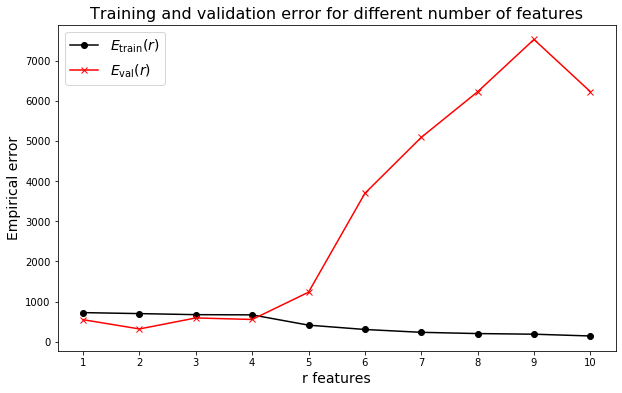

In [69]:
# Plot the training and validation errors for the different number of features r
plt.figure(figsize=(10,6))
plt.plot(range(1, n + 1), err_train, color='black', label=r'$E_{\rm train}(r)$', marker='o')  # Plot training error
plt.plot(range(1, n + 1), err_val, color='red', label=r'$E_{\rm val}(r)$', marker='x')  # Plot validation error

plt.title('Training and validation error for different number of features', fontsize=16)    # Set title
plt.ylabel('Empirical error')    # Set label for y-axis
plt.xlabel('r features')    # Set label for x-axis
plt.xticks(range(1, n + 1))  # Set the tick labels on the x-axis to be 1,...,n
plt.legend()
plt.show()

From the figure, we see that the training error is monotonically decreasing with an increasing number $r$ of features used in the linear predictor $h(\mathbf{x}) = w_{1}x_{1}+\ldots+w_{r}x_{r}$. However, the validation error is first decreasing but then rapidly increases for larger values of $r$. Clearly, the training error is very misleading as a measure for prediction error on new data for large values of $r$, which correspond to more complex models.

Some questions arise when observing the above figure. How come the validation error is lower than the training error when $r < 5$, and why does the validation error drop for $r=10$ features? 

The reason for these apparent anomalies turns out to be pure randomness. Using only a single split of the data into training and validation set bears the risk of being extremely "unlucky", in the sense that the single split might result in a highly non-typical validation set such that the validation error is not a reliable measure for the average error on new data. This problem is particularly prevalent when using small datasets, such as in this exercise ($m=20$).

In our case, the validation set happens to fit the optimal predictors for $r < 5$ too well by chance. As a result, the resulting validation errors are unrealistically low and do not give a reliable estimate of the error on new data. Equally well, we could have obtained a validation set that gives excessively high validation errors and pessimistic estimates of the model's generalization capabilitiesl. 

Next, we will consider $K$-fold cross-validation, a straightforward extension to the "single-split approach" that increases the robustness of the validation error. 

## K-fold Cross-Validation

In general, there is no unique optimal way of splitting a data set into a training and validation set. The precise choice of how to divide data points into the training and validation set and also their relative size (80/20, 50/50 ...) has to be considered case-by-case for the application at hand. 

To get more guidance on how to split the data, one typically needs to have additional knowledge about the statistical properties of the data generating process. An accurate probabilistic model for the data points allows determining optimal split ratios between the training and validation set. That said, probabilistic (generative) models for the observed data points is beyond the scope of this course. 

$K$-fold cross-validation splits the data into $K$ equal-sized subsets. It then performs model validation $K$ times, such that for each iteration, one subset of the data is used as the validation set and the remaining $K-1$ subsets as the training set. Finally, the validation errors from all iterations are averaged to obtain one final estimate of the validation error.

As an example, a diagram of  5-fold cross-validation is depicted below. For each round, the fold which is used as the validation set is indicated by "test". 

![Components](cross_validation_diagram.png)

<a id='kfold'></a>
<div class=" alert alert-info">
<p><b>Demo.</b> Splitting data into K-folds in sklearn.</p>
    
The code snippet below shows how to use a `KFold` object in scikit-learn to iterate through `K` train/validation splits of the dataset `X`.
    
On initialization the `KFold` object is given the number of data splits `K` as an argument to the parameter `n_splits`. The Python [generator function](https://docs.python.org/3.8/glossary.html#term-generator) `KFold.split(X)` can then be used to iterate through the pairs of training and validation indices. 

For an array `idx` of indices, the data points in X corresponding to these indices can be obtained by `X[idx,:]`. We can use this to obtain the training and validation sets given the indices of the datapoints in the respective sets.

For more information, see the scikit-learn [documentation of KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).
</div>  

In [70]:
# Import KFold class from scikitlearn library
from sklearn.model_selection import KFold

K=5    # Specify the number of folds of split data into
kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

# For all splits, print the validation and training indices
iteration = 0
for train_indices, test_indices in kf.split(X):
    iteration += 1
    X_train = X[train_indices,:]    # Get the training set    
    X_val = X[test_indices,:]    # Get the validation set
    print('Iteration {}:'.format(iteration))
    print('Indices for validation set:', test_indices)
    print('Indices for training set:', train_indices)
    print('X_val shape: {}, X_train shape: {} \n'.format(X_val.shape, X_train.shape))

Iteration 1:
Indices for validation set: [0 1 2 3]
Indices for training set: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 2:
Indices for validation set: [4 5 6 7]
Indices for training set: [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 3:
Indices for validation set: [ 8  9 10 11]
Indices for training set: [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 4:
Indices for validation set: [12 13 14 15]
Indices for training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 5:
Indices for validation set: [16 17 18 19]
Indices for training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
X_val shape: (4, 10), X_train shape: (16, 10) 



<a id='kfold'></a>
<div class=" alert alert-warning">
<p><b>Student task.</b> 5-Fold Cross Validation.</p>
     
The purpose of the code snippet below is to compute the training and validation errors for each choice of $r=1,\ldots,n$ using 5-fold cross-validation. Your task is to complete the part of the loop that performs 5-fold cross-validation using the `KFold` class in scikit-learn. For each $r$ you should
    
1. Iterate over the `K` pairs of train and test indices and for each pair, calculate the training and validation errors of a linear regression model (with `fit_intercept=False`) and store them in  `train_errors_per_cv_iteration` and `test_errors_per_cv_iteration` respectively.
    
    
2. Calculate the average training- and validation errors and store these at index `r_minus_1` in the arrays `err_train` and `err_val` (both of shape $(n, )$) respectively.

For more information, see the scikit-learn [documentation of KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

Afterwards, the training- and validation errors are plotted for comparison with the errors from the previous student task.

</div>  

In [71]:
m = 20    # we use the first m=20 data points (pixels) from the aerial photo 
n = 10

X, y = GetFeaturesLabels(m,n)  # read in m data points with n features 

err_train = np.zeros(n)  # Array to store training errors
err_val = np.zeros(n)  # Array to store validation errors

K = 5
kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

for r_minus_1 in range(n):
    train_errors_per_cv_iteration = []  # List for storing the training errors for the splits
    val_errors_per_cv_iteration = []  # List for storing the validation errors for the splits
    
    ### STUDENT TASK ###
    ### BEGIN SOLUTION
    for train_indices, test_indices in kf.split(X):
        reg = LinearRegression(fit_intercept=True)    # Create new linear regression model
        reg = reg.fit(X[train_indices,:(r_minus_1+1)], y[train_indices])    # Fit the model on the current training set
        y_pred_train = reg.predict(X[train_indices,:(r_minus_1+1)])    # Calculate the predicted labels of the current training set
        train_errors_per_cv_iteration.append(mean_squared_error(y[train_indices], y_pred_train))    # Add the training error to list of errors
        y_pred_val = reg.predict(X[test_indices,:(r_minus_1+1)])    # Calculate the predicted labels of the current test set
        val_errors_per_cv_iteration.append(mean_squared_error(y[test_indices], y_pred_val))    # Add the test error to list of errors

    err_train[r_minus_1] = np.mean(train_errors_per_cv_iteration)    # compute the mean of round-wise training errors
    err_val[r_minus_1] = np.mean(val_errors_per_cv_iteration)    # compute the mean of round-wise validation errors
    ### END SOLUTION
    
print('Training errors for each K:')
print(err_train, '\n')
print('Validation error for each K:')
print(err_val, '\n')

Training errors for each K:
[631.28636158 557.86574278 554.68354446 543.47072525 370.25757289
 341.15136359 329.38072381 315.62556441 294.28613218 230.99096498] 

Validation error for each K:
[1028.31563438 1079.96916852 1094.19465095 1171.47537318 1218.00693881
 1448.6432327  1492.38640461 1785.1386129  2764.84395395 4356.44215896] 



In [72]:
# Perform sanity checks on the outputs
assert err_train.shape == (n,), "err_train is of the wrong shape!"
assert err_val.shape == (n,), "err_val is of the wrong shape!"
assert err_val[0] < err_val[1], "The second element of err_val should be larger than the first element!"

print("Sanity checks passed!")

### BEGIN HIDDEN TESTS
t_err_train = np.zeros(n)  # Array to store training errors
t_err_val = np.zeros(n)  # Array to store validation errors

K = 5
t_kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

for r in range(n):
    t_train_errors_per_cv_iteration = []  # List for storing the training errors for the splits
    t_val_errors_per_cv_iteration = []  # List for storing the validation errors for the splits
    
    ### STUDENT TASK ###
    ### BEGIN SOLUTION
    for train_indices, test_indices in t_kf.split(X):
        t_reg = LinearRegression(fit_intercept=True)    # Create new linear regression model
        t_reg = t_reg.fit(X[train_indices,:(r+1)], y[train_indices])    # Fit the model on the current training set
        t_y_pred_train = t_reg.predict(X[train_indices,:(r+1)])    # Calculate the predicted labels of the current training set
        t_train_errors_per_cv_iteration.append(mean_squared_error(y[train_indices], y_pred_train))    # Add the training error to list of errors
        t_y_pred_val = t_reg.predict(X[test_indices,:(r+1)])    # Calculate the predicted labels of the current test set
        t_val_errors_per_cv_iteration.append(mean_squared_error(y[test_indices], y_pred_val))    # Add the test error to list of errors

    t_err_train[r] = np.mean(train_errors_per_cv_iteration)    # compute the mean of round-wise training errors
    t_err_val[r] = np.mean(val_errors_per_cv_iteration)    # compute the mean of round-wise validation errors
    ### END SOLUTION
### END HIDDEN TESTS

Sanity checks passed!


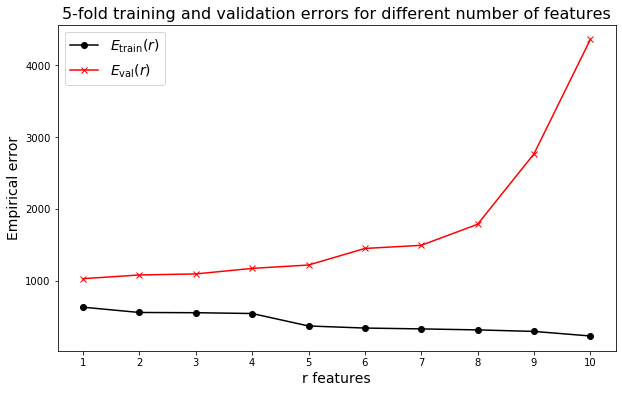

In [73]:
# Plot the training and validation errors for the different number of features r
plt.figure(figsize=(10,6))
plt.plot(range(1, n+1), err_train, color='black', label=r'$E_{\rm train}(r)$', marker='o')  # Plot training error
plt.plot(range(1, n+1), err_val, color='red', label=r'$E_{\rm val}(r)$', marker='x')  # Plot validation error

plt.title('5-fold training and validation errors for different number of features', fontsize=16)    # Set title
plt.ylabel('Empirical error')    # Set label for y-axis
plt.xlabel('r features')    # Set label for x-axis
plt.xticks(range(1, n + 1))  # Set the tick labels on the x-axis to be 1,...,n
plt.legend()
plt.show()

If we compare the figure above to the one in the previous student task, we can see that the validation error obtained by 5-fold cross-validation seems to provide a more realistic estimate of the model's performance on new data. The validation error is now consistently larger than the training error, and the rising trend of the validation error seems slightly smoother.

In practice, it is almost always preferable to use K-fold cross-validation instead of a single validation split for model validation and selection due to the increased robustness of the validation error.

##  Regularization

Consider an ML method based on a large hypothesis space such as linear predictors using many features or polynomials with a large degree. Large hypothesis spaces typically contain complex predictors that achieve very low training errors by overfitting the data. Thus, if we search for the optimal predictor in this hypothesis space (i.e train our model) by minimizing the training error, we will obtain a predictor that overfits the training data and  generalizes poorly to data that is not in the training set.

One solution to prevent overfitting is to choose a model out of a selection of candidate models based on the validation error, like we did in the student task "Compute Training and Validation Error". By using the validation error as the selection criteria, we are able to select the model that performs best on new data. While this approach is useful, it can be very difficult to implement in settings where the number of feasible hypothesis spaces is very large.

**Regularization** is a more sophisticated approach to prevent overfitting, and is based on the idea of **estimating the expected increase of the validation error (relative to the training error) incurred by more complex predictors**. When applying regularization, a large hypothesis space is used in conjunction with a cost function that penalizes the complexity of the 
predictor. By penalizing the complexity of the predictor function, the optimal predictor that minimizes the cost function will be less complex than the one minimizing the non-penalized function. 

In practice, the penalization is done by adding a **regularization term** $\mathcal{R}(h)$ to the training error: 

\begin{equation}
h^{(\lambda)}_{\rm opt}  = {\rm argmin}_{h \in \mathcal{H}} \underbrace{\underbrace{(1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2}}_{\mbox{ training error}} + \underbrace{\alpha \mathcal{R}(h)}_{\mbox{anticipated increase of error (loss) on new data}}}_{\mbox{ estimate (approximation) of validation error }}.  
\end{equation}

The regularization term $\mathcal{R}(h)$ quantifies the anticipated increase in the validation error (compared to the training error) due to the "complexity" (e.g. the number of features used in a linear predictor) of a particular predictor. In a nutshell, the regularization term penalizes the use of more complex predictors and therefore favors "simpler" predictor functions. The precise meaning of "complexity" or "simpler" is determined by the (design) choice for the regularization term $\mathcal{R}(h)$. 

The regularization parameter $\alpha$ **offers a trade-off between the prediction error (training error) incurred on the training data and the complexity of a predictor**. The larger we choose $\alpha$, the more emphasis is put on obtaining "simple" predictor functions. Using very small values for $\alpha$ prefers predictor functions which achieve a small training error (at the expense of being a more complicated function).

A principled approach to these choices is to assume a probabilistic model for how the data points are generated. It is then possible to relate optimal choices for the function $\mathcal{R}(h)$ and the value $\alpha$ to the parameters of the probability distribution of the data points. However, probabilistic modelling in machine learning is beyond the scope of this course. 


### The regularization term (choosing $\mathcal{R}(h)$)

In order to implement regularization in practice, we need to choose a regularization term $\mathcal{R}$ that quantifies a notion of complexity that is suitable for our purpose. Two widely used choices based on the model parameters $\mathbf{w}$ are the $\ell_1$ norm 

\begin{equation}
\|\mathbf{w} \|_1 = |w_1| + |w_2| + \ldots + |w_n|
\end{equation}

and the squared $\ell_2$ norm

\begin{equation}
\|\mathbf{w} \|_2^2 = w_1^2 + w_2^2 + \ldots + w_n^2.
\end{equation}



A principled approach to these choices is to assume a probabilistic model for how the data points are generated. It is then possible to relate optimal choices for the function $\mathcal{R}(h)$ and the value $\alpha$ to the parameters of the probability distribution of the data points. However, probabilistic modelling in machine learning is beyond the scope of this course. 

### Hyperparameter tuning (choosing $\alpha$)

The $\alpha$ term in the regularized cost function is a **hyperparameter** of the model that is fitted by minimizing this function. In contrast to the **model parameters**, the hyperparameters of the model are not found by fitting the model, but must be chosen more or less manually by the practitioner. The values of the hyperparameters might affect the form of the predictor and/or loss functions, or even the behavior of the algorithm that is used to optimize the model. Intuitively, we wish to select the model hyperparameters so that the model generalizes as well as possible to new data.

To this end, we can once again use the of validation error to estimate the generalization capability of a model for different values for the hyperparameters.

Instead of probabilistic modelling, we can use again the concept of validation sets to find good choices for the regularization function and parameter. In particular, 
- we first specify a set of different choices for the function $\mathcal{R}(h)$ and regularization parameter value $\alpha$, 
- for each choice for $\alpha$ and $\mathcal{R}(h)$, we learn a predictor that minimizes the regularized training error 

\begin{equation}
h^{(\alpha)}_{\rm opt}  = {\rm argmin}_{h \in \mathcal{H}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha \mathcal{R}(h).    
\end{equation}
- evaluate the resulting predictor $h^{(\alpha)}_{\rm opt}$ by computing the validation error
\begin{equation}
E_{\rm val}^{(\alpha)} = (1/m_{\rm v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(\alpha)}_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}.
\end{equation} 

We then use the regularization measure $\mathcal{R}(h)$ and the value for $\alpha$ with smallest validation error $E_{\rm val}^{(\alpha)}$. 

<a id='ridgeReg'></a>
<div class=" alert alert-info">
<p><b>Demo.</b> Ridge Regression. </p>

Ridge regression learns a linear predictor functions $h^{(\mathbf{w})}(\mathbf{x}) =\mathbf{w}^{T} \mathbf{x}$ by minimizing the sum of training error and the scaled regularization term $\mathcal{R}(h)=\|\mathbf{w}\|_{2}^{2}$. A ridge regression model can be fitted to a dataset with scikit-learn by using the function `Ridge.fit()`. After fitting the model, the optimal weight vector $\mathbf{w}_{\rm opt}$ is stored in the attribute `Ridge.coef_` of the `Ridge` instance. 

[See documentation of Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

</div>  

In [77]:
from sklearn.linear_model import Ridge

m = 20
n = 10
X, y = GetFeaturesLabels(m, n)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)  # 80% training and 20% test

alpha = 10    # Define value of the regularization parameter 'alpha'

ridge = Ridge(alpha=alpha, fit_intercept=True)    # Create Ridge regression model
ridge.fit(X_train, y_train)    # Fit the Ridge regression model on the training set
y_pred = ridge.predict(X_train)    # Predict the labels of the training set
w_opt = ridge.coef_    # Get the optimal weights (regression coefficients) of the fitted model
err_train = mean_squared_error(y_pred, y_train)    # Calculate the training error

# Print optimal weights and training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', err_train)

Optimal weights: 
 [[ 1.28972584  3.21494358  3.87405966 -0.3518216   8.01849684 -1.56374006
   0.30961462 -1.92330406 -0.92839288 -6.83999945]]
Training error: 
 430.908439591321


**The Lasso** is another regularized regression method, which regularizes the training error of linear predictors $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ with the complexity measure $\mathcal{R}(h)= \|\mathbf{w}\|_{1}$. In Lasso regression, it is customary to use a regularized loss function where the training error term is multiplied by $1/2$. That is,

\begin{equation}
\mathcal{E}(\textbf{w}) = \frac{1}{2m_t} \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha |\textbf{w}|.
\end{equation}

Since $\alpha$ can be freely chosen, the multiplicative constant is of no practical importance and is only included in order to make analytical calculations more convenient. Still, the exact form of the loss function is important knowledge since this loss function is typically used in Lasso implementations, incuding the one in scikit-learn.

<a id='lassoReg'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Lasso Regression.

Complete the function `fit_lasso` that uses the Scikit-learn function `Lasso.fit()` to compute the optimal predictor for $\alpha=$ `alpha_val`. When initializing Lasso, please use `fit_intercept=True`. This function is then used find the optimal Lasso predictor for $\alpha = 10$.

[Documentation for Lasso in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

</div>

In [78]:
from sklearn.linear_model import Lasso

X,y = GetFeaturesLabels(m,n)    # read in m data points using n features 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)    # 80% training and 20% test

def fit_lasso(X_train, y_train, alpha_val):
    ### STUDENT TASK ###
    # .
    # .
    # .
    # w_opt = ...
    # training_error = ...
    ### BEGIN SOLUTION
    lasso = Lasso(alpha=alpha_val, fit_intercept=True)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_train)
    w_opt = lasso.coef_
    training_error = mean_squared_error(y_pred, y_train)
    ### END SOLUTION
    return w_opt, training_error

In [80]:
# Set alpha value
alpha_val = 10

# Fit Lasso and calculate optimal weights and training error using the function 'fit_lasso'
w_opt, training_error = fit_lasso(X_train, y_train, alpha_val)

# Print optimal weights and the corresponding training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', training_error)

# Perform some sanity checks on the outputs
from sklearn.linear_model import Lasso
assert w_opt.reshape(-1,1).shape == (10,1), "'w_opt' has wrong shape"
assert np.isscalar(training_error), "'training_error' is not scalar"
assert training_error < 1000, "'training_error' is too large"
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
def t_fitLasso(x_train, y_train, lambd=0):
    t_lasso = Lasso(alpha=lambd, fit_intercept=True)
    t_lasso.fit(X_train, y_train)
    y_pred = t_lasso.predict(X_train)
    w_opt = t_lasso.coef_
    training_error = mean_squared_error(y_pred, y_train)
    return w_opt, training_error

t_w_opt, t_training_error = t_fitLasso(X_train, y_train, lambd=10)

np.testing.assert_allclose(t_w_opt.reshape(-1,1), w_opt.reshape(-1,1), rtol=1e-10, atol=0)
np.testing.assert_almost_equal(t_training_error, training_error)

### END HIDDEN TESTS

Optimal weights: 
 [ 1.25892034  0.          0.          0.          0.02903618 -0.
 -0.         -0.         -0.         -2.24285607]
Training error: 
 672.150541332067
Sanity check tests passed!


When using Lasso or ridge regression, we need to find a suitable value for the regularization parameter $\alpha$. A simple but useful approach is **grid search**: We first specify a list of values to be used for the regularization parameter. For each value $\alpha$, we determine a predictor $h^{(\alpha)}$ by minimizing the regularized training error: 
\begin{equation}
h^{(\alpha)}  = {\rm argmin}_{h \in \mathcal{H}} (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha \mathcal{R}(h).    
\end{equation}
The resulting training error is 
\begin{equation} 
E_{\rm train}(\alpha) = (1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h^{(\alpha)}(\mathbf{x}^{(i)}) \big)^{2}. 
\end{equation}
Note that the training error $E_{\rm train}(\alpha)$ is measured on the training data $\mathbb{X}^{t}$ which was also used to tune the predictor $h^{(\alpha)}$ (in the above opimtization problem). Therefore, $E_{\rm train}(\alpha)$ is too optimistic as a measure for the average error of $h^{(\alpha)}$ on new data points. Instead, we will measure the quality of $h^{(\alpha)}$ via the validation error  
\begin{equation} 
E_{\rm val}(\alpha) = (1/m_{v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(\alpha)}(\mathbf{x}^{(i)}) \big)^{2} 
\end{equation}
incurred by the predictor $h^{(\alpha)}$ on the validation set $\mathbb{X}^{(v)}$. We then choose the value $\alpha$ resulting in the smallest validation error $E_{\rm val}(\alpha)$. This grid search can be computationally expensive since we have to solve a separate optimization problem (of minimizing the regularized training error) for each value of $\alpha$. 

<a id='lassoParameter'></a>
<div class=" alert alert-warning">
<b>Student Task.</b> Tuning Lasso Parameter.
    
Complete the function `lasso_param_search` that computes the Lasso estimator $h^{(\alpha)}$ for each value $\alpha$ in the input parameter `alpha_values`. The function returns the resulting validation errors $E_{\rm val}(\alpha^{(i)})$ and training errors $E_{\rm train}(\alpha^{(i)})$ in the numpy arrays `err_val` of shape (`n_values`,1) and `err_train` of shape (`n_values`,1), as well as the weight vector of the optimal model with the optimal alpha $\hat{\alpha}$ (yielding the smallest validation error) in the variable `w_opt`. In the error arrays, the first entry `err_val[0]` should be $E_{\rm val}(\alpha^{(1)})$, and so on. 

[scikit-learn function for Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) 

</div>

In [ ]:
def lasso_param_search(X_train, X_val, y_train, y_val, alpha_values):
    n_values = len(alpha_values)    # The number of candidate values for 'alpha'
    err_train = np.zeros([n_values,1])    # Array for training errors
    err_val = np.zeros([n_values,1])    # Array for validation errors
    
    ### STUDENT TASK ###
    # Pseudocode:
    # -For each alpha in alpha_values:
    #   -fit a lasso model on the training data
    #   -calculate and store training and validation errors
    # -Find the best alpha (i.e. the one with the lowest validation error)
    # -Calculate/retrieve the optimal weights (coefficients) corresponding to this alpha
    ### BEGIN SOLUTION
    for l in range(n_values):
        lasso = Lasso(alpha=alpha_values[l], fit_intercept=False)
        lasso = lasso.fit(X_train, y_train)
        y_train_pred = lasso.predict(X_train)
        err_train[l] = mean_squared_error(y_train_pred, y_train)
        y_val_pred = lasso.predict(X_val)
        err_val[l] = mean_squared_error(y_val_pred, y_val)

    best_alpha_idx = np.argmin(err_val)
    lasso = Lasso(alpha=alpha_values[best_alpha_idx], fit_intercept=False)
    lasso = lasso.fit(X_train, y_train)
    w_opt = lasso.coef_
    ### END SOLUTION
    return w_opt, err_train, err_val

In [ ]:
# Specify a list of values for alpha to be considered
alpha_values = np.array([0.01, 0.05, 0.2, 1, 3, 10, 1e2, 1e3, 1e4])

# Calculate the optimal weights, and training and validation errors for the alpha values defined above using lasso_param_search
w_opt, err_train, err_val = lasso_param_search(X_train, X_val, y_train, y_val, alpha_values)

# Perform some sanity checks on the outputs
assert w_opt.reshape(-1,1).shape == (10,1), "'w_opts' has wrong shape"
assert len(err_train) == 9, "'err_train' has wrong shape"
assert len(err_val) == 9, "'err_val' has wrong shape"
print('Sanity check tests passed!')


### BEGIN HIDDEN TESTS

def t_lasso_param_search(X_train, X_val, y_train, y_val, alpha_values):
    n_values = len(alpha_values)
    err_train = np.zeros([n_values,1]) # Array for training errors
    err_val = np.zeros([n_values,1]) # Array for validation errors
    
    ### STUDENT TASK ###
    ### BEGIN SOLUTION
    for l in range(n_values):
        lasso = Lasso(alpha=alpha_values[l], fit_intercept=False)
        lasso = lasso.fit(X_train, y_train)
        y_train_pred = lasso.predict(X_train)
        err_train[l] = mean_squared_error(y_train_pred, y_train)
        y_val_pred = lasso.predict(X_val)
        err_val[l] = mean_squared_error(y_val_pred, y_val)

    best_alpha_idx = np.argmin(err_val)
    lasso = Lasso(alpha=alpha_values[best_alpha_idx], fit_intercept=False)
    lasso = lasso.fit(X_train, y_train)
    w_opt = lasso.coef_
    w_opt = w_opt.reshape(-1,1)
    ### END SOLUTION
    return w_opt, err_train, err_val
    
t_w_opt, t_err_train, t_err_val = t_lasso_param_search(X_train, X_val, y_train, y_val, alpha_values)
    
np.testing.assert_allclose(t_err_val.reshape(-1,1), err_val.reshape(-1,1), rtol=1e-10, atol=0)
np.testing.assert_allclose(t_err_train.reshape(-1,1), err_train.reshape(-1,1), rtol=1e-10, atol=0)
np.testing.assert_allclose(t_w_opt, w_opt.reshape(-1,1), rtol=1e-10, atol=0)
### END HIDDEN TESTS

In [ ]:
# Plot the training and validation errors
plt.figure(figsize=(10,6))    # Set figure size
plt.plot(alpha_values, err_train, marker='o', color='black', label='training error')    # Plot training errors
plt.plot(alpha_values, err_val, marker='o', color='red', label='validation error')    # Plot validation errors
plt.xscale('log')    # Set x-axis to logarithmic scale
plt.xlabel(r'$\alpha$')    # Set label of x-axis
plt.ylabel(r'$E(\alpha)$')    # Set label of y-axis
plt.title(r'Errors with respect to $\alpha$', fontsize=16)    # Set title
plt.legend()    # Show legend
plt.show()

## Take Home Quiz

Answer the following questions by setting, for each question, the variable `answer_R4_Q??` to the index of the correct answer. E.g. if you think that the second answer in the first quiz question is the right one, then set `answer_R4_Q1=2`. 

<a id='QuestionR4_1'></a>
<div class=" alert alert-warning">
<p><b>Student Task.</b> Question R4.1. </p>

<p>What is the goal of model selection in machine learning?</p>

<ol>
  <li> To choose (learn) the optimal predictor function $h_{\rm opt}$ out of a given hypothesis space  $\mathcal{H}$.</li>
  <li> To select the most suitable car model using machine learning methods.</li>
  <li> To select the optimal weights used for regularization.</li>
  <li> To select the best hypothesis space out of a set of candidates $\lbrace \mathcal{H}^{(1)}, \mathcal{H}^{(2)}, \ldots,\mathcal{H}^{(n)} \rbrace$.</li>
</ol> 

</div>

In [ ]:
# answer_R4_Q1  = ...
### BEGIN SOLUTION
answer_R4_Q1 = 4
### END SOLUTION

In [ ]:
# this cell is for tests
assert answer_R4_Q1 in [1,2,3,4], '"answer_R4_Q1" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
assert answer_R4_Q1 in [1,2,3,4], '"answer_R4_Q1" Value should be an integer between 1 and 4.'
assert answer_R4_Q1 == 4, ' "answer_R4_Q1" Correct answer is 4.'
### END HIDDEN TESTS

<a id='QuestionR4_2'></a>
<div class=" alert alert-warning">
<p><b>Student Task.</b> Question R4.2. </p>

<p>What is a good measure for the prediction error (loss) incurred by a predictor function $h(\mathbf{x})$ on new data points?</p>
<ol>
  <li> The empirical error (average loss) of $h(\mathbf{x})$ on the <b>training set</b> which is also used to tune $h(\mathbf{x})$. </li>
  <li> The empirical error (average loss) of $h(\mathbf{x})$ on some <b>validation set</b> which is different from the training set. 
</ol> 

</div>

In [ ]:
# answer_R4_Q2  = ...
### BEGIN SOLUTION
answer_R4_Q2 = 2
### END SOLUTION

In [ ]:
# this cell is for tests
assert answer_R4_Q2 in [1,2], '"answer_R4_Q2" Value should be an integer between 1 and 2.'
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
assert answer_R4_Q2 in [1,2], '"answer_R4_Q2" Value should be an integer between 1 and 2.'
assert answer_R4_Q2 == 2, ' "answer_R4_Q2" Correct answer is 2.'
### END HIDDEN TESTS

<a id='QuestionR4_3'></a>
<div class=" alert alert-warning">
<p><b>Student Task.</b> Question R4.3. </p>

Regularized linear regression amounts to finding the predictor $h(\mathbf{x})$ which minimizes the regularized training error 
\begin{equation} 
(1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha \mathcal{R}(h).
\end{equation}
Which statement is true?

<ol>
  <li> Using a large value for the regularization parameter $\alpha$ prefers predictors with large complexity $\mathcal{R}(h)$ but small training error.</li>
  <li>  Using a small value for the regularization parameter $\alpha$ prefers predictors with large complexity $\mathcal{R}(h)$ but small training error.</li>
  <li> For regularization parameter $\alpha=0$, the optimal predictor is always $h(\mathbf{x}) =0$. </li>
  <li> For regularization parameter $\alpha=0$, the optimal predictor is always $h(\mathbf{x}) =42$.</li>
</ol> 

</div>

In [ ]:
# answer_R4_Q3  = ...
### BEGIN SOLUTION
answer_R4_Q3 = 2
### END SOLUTION

In [ ]:
# this cell is for tests
assert answer_R4_Q3 in [1,2,3,4], '"answer_R4_Q3" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
assert answer_R4_Q3 in [1,2,3,4], '"answer_R4_Q3" Value should be an integer between 1 and 4.'
assert answer_R4_Q3 == 2, ' "answer_R4_Q3" Correct answer is 2.'
### END HIDDEN TESTS

<a id='QuestionR4_4'></a>
<div class=" alert alert-warning">
<p><b>Student Task.</b> Question R4.4. </p>

Use the previously implemented code in "Tuning Lasso Parameter" to find the optimal predictor (lowest validation error) for $\alpha=$ `alpha_val`. Using the same dataset.
When initializing Lasso, please use `fit_intercept=False`. 
<p>Which alpha should be chosen to achieve an optimal predictor?</p> 
<p>Possible alpha values are given in the code cell below.</p>
</div>

In [ ]:
alpha_values = np.array([0.01, 0.05, 0.2, 1, 3, 10, 1e2, 1e3])

# answer_R4_Q4  = ...
### BEGIN SOLUTION
answer_R4_Q4 = 1e3
### END SOLUTION

In [ ]:
# this cell is for tests
assert answer_R4_Q4 in [0.01, 0.05, 0.2, 1, 3, 10, 1e2, 1e3], 'answer_R4_Q3" Value should be a value out of given alpha values..'
print('Sanity check tests passed!')

### BEGIN HIDDEN TESTS
assert answer_R4_Q4 == 1e3, ' answer_R4_Q4" Correct answer is 1e3.'
### END HIDDEN TESTS